In [1]:
%load_ext autoreload
%autoreload 2

from pdac_utils import *

import numpy as np
import pandas as pd
import scanpy as sc
import scplot as scp
from anndata import AnnData
from glob import glob
from matplotlib import pyplot as plt

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)

/home/unix/kjag/.conda/envs/pegasus/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
combinenaivedata = sc.read("data/combinenaivedata-reprocessed-clean-detailed.h5ad")
combinetreateddata = sc.read("data/combinetreateddata-reprocessed-clean-annotated.h5ad")

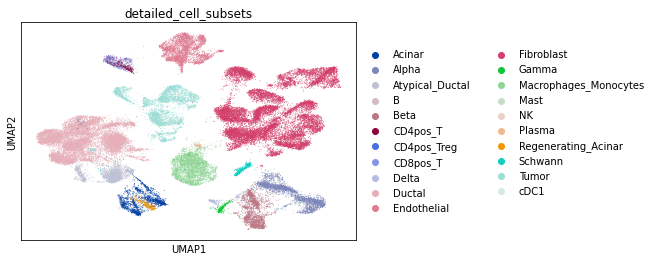

In [3]:
sc.pl.umap(combinetreateddata, color='detailed_cell_subsets')

In [4]:
translation = {
  '2591_T':'Ignore',
  'Acinar':'Acinar',
  'Alpha':'Alpha',
  'Atypical_Ductal':'Ductal',
  'B':'B_Lymphocytes',
  'Beta':'Beta',
  'CD4pos_T':'T_Lymphocytes',
  'CD4pos_Tregs':'T_Lymphocytes',
  'CD8pos_T':'T_Lymphocytes',
  'DC_activated':'DC',
  'Delta':'Delta',
  'Ductal':'Ductal',
  'Endothelial':'Endothelial',
  'Fibroblast':'Fibroblast',
  'Gamma':'Gamma',
  'Macrophages_Monocytes':'Myeloid',
  'Mast':'Myeloid',
  'NK':'T_Lymphocytes',
  'NascentEndothelial':'Endothelial',
  'Plasma':'B_Lymphocytes',
  'Schwann':'Schwann',
  'SmoothMuscle':'SmoothMuscle',
  'Tumor':'Tumor',
  'cDC1':'DC',
  'cDC2':'DC',
  'pDC':'DC',
  'CD4pos_Treg':'T_Lymphocytes',
  'Regenerating_Acinar':'Acinar',
}

In [5]:
combinenaivedata.obs['comparison_cell_subsets'] = [translation.get(celltype, celltype) for celltype in combinenaivedata.obs['detailed_cell_subsets']]
combinetreateddata.obs['comparison_cell_subsets'] = [translation.get(celltype, celltype) for celltype in combinetreateddata.obs['detailed_cell_subsets']]

... storing 'comparison_cell_subsets' as categorical


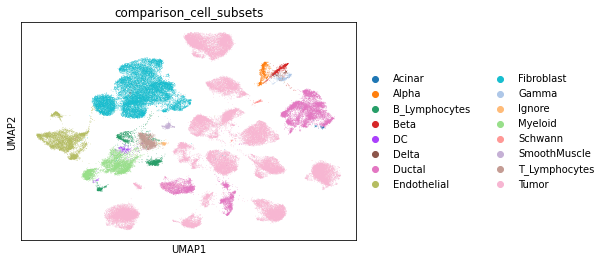

... storing 'comparison_cell_subsets' as categorical


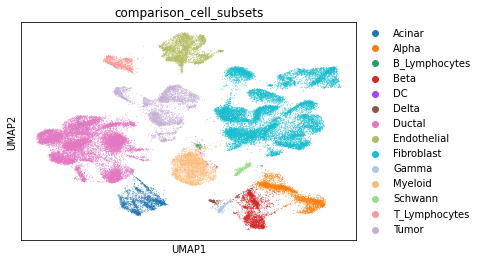

In [6]:
sc.pl.umap(combinenaivedata, color='comparison_cell_subsets')
sc.pl.umap(combinetreateddata, color='comparison_cell_subsets')

In [7]:
#combinenaivedata = combinenaivedata[(combinenaivedata.obs['cell_subsets']!='Tumor')&(combinenaivedata.obs['cell_subsets']!='Ignore')]
#combinetreateddata = combinetreateddata[combinetreateddata.obs['cell_subsets']!='Tumor']

In [8]:
cmap={'0':'#e41a1c','1':'#377eb8','2':'#4daf4a','3':'#984ea3',
'4':'#ff7f00','5':'#ffff33','6': '#a65628','7':'#f781bf', '8': 'LightGrey', '9':'black'}

display(scp.composition_plot(combinenaivedata, 'pid', 'cell_subsets', height=350))
display(scp.composition_plot(combinenaivedata, 'cell_subsets', 'pid', height=500))

for celltype in ['Immune', 'Endocrine']:
    subset = combinenaivedata[combinenaivedata.obs['cell_subsets']==celltype]
    display(scp.composition_plot(subset, 'pid', 'comparison_cell_subsets', height=500))
    display(scp.composition_plot(subset, 'comparison_cell_subsets', 'pid', height=500))

for celltype in ['DC']:
    subset = combinenaivedata[combinenaivedata.obs['comparison_cell_subsets']==celltype]
    display(scp.composition_plot(subset, 'pid', 'detailed_cell_subsets', height=500))
    display(scp.composition_plot(subset, 'detailed_cell_subsets', 'pid', height=500))

:Bars   [pid,cell_subsets]   (value)

:Bars   [cell_subsets,pid]   (value)

:Bars   [pid,comparison_cell_subsets]   (value)

:Bars   [comparison_cell_subsets,pid]   (value)

:Bars   [pid,comparison_cell_subsets]   (value)

:Bars   [comparison_cell_subsets,pid]   (value)

:Bars   [pid,detailed_cell_subsets]   (value)

:Bars   [detailed_cell_subsets,pid]   (value)

In [9]:
display(scp.composition_plot(combinetreateddata, 'pid', 'cell_subsets', height=350))
display(scp.composition_plot(combinetreateddata, 'cell_subsets', 'pid', height=500))

for celltype in ['Immune', 'Endocrine']:
    subset = combinetreateddata[combinetreateddata.obs['cell_subsets']==celltype]
    display(scp.composition_plot(subset, 'pid', 'comparison_cell_subsets', height=500))
    display(scp.composition_plot(subset, 'comparison_cell_subsets', 'pid', height=500))
    
for celltype in ['DC']:
    subset = combinetreateddata[combinetreateddata.obs['comparison_cell_subsets']==celltype]
    display(scp.composition_plot(subset, 'pid', 'detailed_cell_subsets', height=500))
    display(scp.composition_plot(subset, 'detailed_cell_subsets', 'pid', height=500))


:Bars   [pid,cell_subsets]   (value)

:Bars   [cell_subsets,pid]   (value)

:Bars   [pid,comparison_cell_subsets]   (value)

:Bars   [comparison_cell_subsets,pid]   (value)

:Bars   [pid,comparison_cell_subsets]   (value)

:Bars   [comparison_cell_subsets,pid]   (value)

:Bars   [pid,detailed_cell_subsets]   (value)

:Bars   [detailed_cell_subsets,pid]   (value)

In [10]:
combinenaivedata.obs['status'] = ['Naive']*combinenaivedata.shape[0]
combinetreateddata.obs['status'] = ['Treated']*combinetreateddata.shape[0]

totaldata = combinenaivedata.concatenate([combinetreateddata])

In [11]:
#display(scp.composition_plot(totaldata, 'status', 'cell_subsets', height=350))
display(scp.composition_plot(totaldata, 'cell_subsets', 'status', height=500))

for celltype in ['Immune', 'Endocrine']:
    subset = totaldata[totaldata.obs['cell_subsets']==celltype]
    display(scp.composition_plot(subset, 'comparison_cell_subsets', 'status', height=500))
    display(scp.composition_plot(subset, 'status', 'comparison_cell_subsets', height=500))
    
for celltype in ['DC']:
    subset = totaldata[totaldata.obs['comparison_cell_subsets']==celltype]
    display(scp.composition_plot(subset, 'detailed_cell_subsets', 'status', height=500))
    display(scp.composition_plot(subset, 'status', 'detailed_cell_subsets', height=500))

:Bars   [cell_subsets,status]   (value)

:Bars   [comparison_cell_subsets,status]   (value)

:Bars   [status,comparison_cell_subsets]   (value)

:Bars   [comparison_cell_subsets,status]   (value)

:Bars   [status,comparison_cell_subsets]   (value)

:Bars   [detailed_cell_subsets,status]   (value)

:Bars   [status,detailed_cell_subsets]   (value)

In [12]:
import seaborn as sns
from scipy.stats import ttest_ind

In [13]:
from scipy.stats import mannwhitneyu
from scipy.stats import ranksums


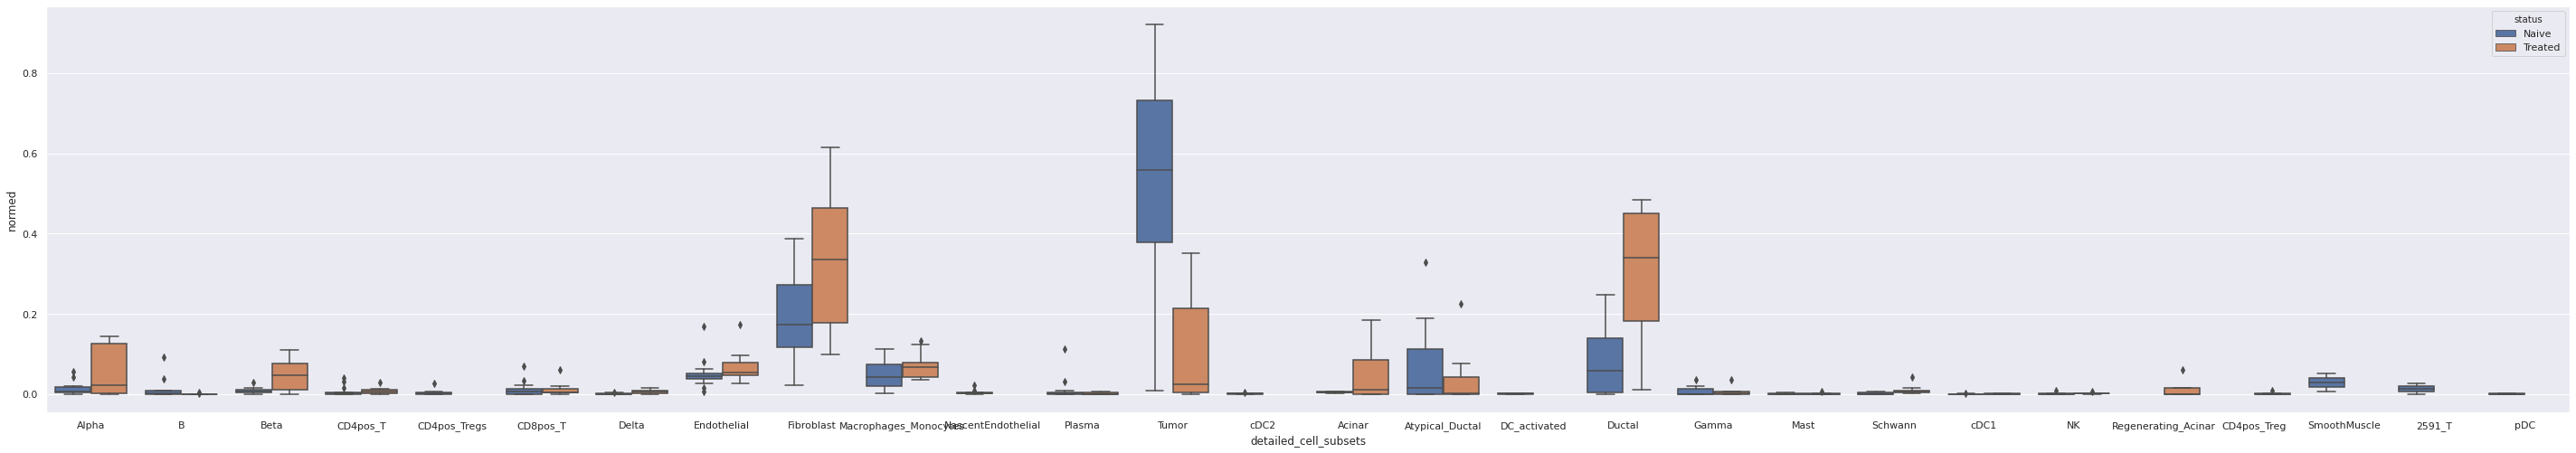

Acinar MannwhitneyuResult(statistic=6.0, pvalue=0.43381616738909634)
Tumor MannwhitneyuResult(statistic=15.0, pvalue=0.00025324983502911697)
Alpha MannwhitneyuResult(statistic=46.0, pvalue=0.17896668494669993)
CD4pos_T MannwhitneyuResult(statistic=47.0, pvalue=0.1388935334526511)
CD4pos_Tregs MannwhitneyuResult(statistic=0.0, pvalue=0.0)
Ductal MannwhitneyuResult(statistic=14.0, pvalue=0.0048748684370059706)
Schwann MannwhitneyuResult(statistic=16.0, pvalue=0.002518340575195503)
NK MannwhitneyuResult(statistic=20.0, pvalue=0.3256892232381963)
DC_activated MannwhitneyuResult(statistic=0.0, pvalue=0.0)
NascentEndothelial MannwhitneyuResult(statistic=0.0, pvalue=0.0)
CD4pos_Treg MannwhitneyuResult(statistic=0.0, pvalue=0.0)
Regenerating_Acinar MannwhitneyuResult(statistic=0.0, pvalue=0.0)
Delta MannwhitneyuResult(statistic=16.0, pvalue=0.006085750673944833)
pDC MannwhitneyuResult(statistic=0.0, pvalue=0.0)
Endothelial MannwhitneyuResult(statistic=49.0, pvalue=0.04338408635193781)
Macropha

/home/unix/kjag/.conda/envs/pegasus/lib/python3.7/site-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


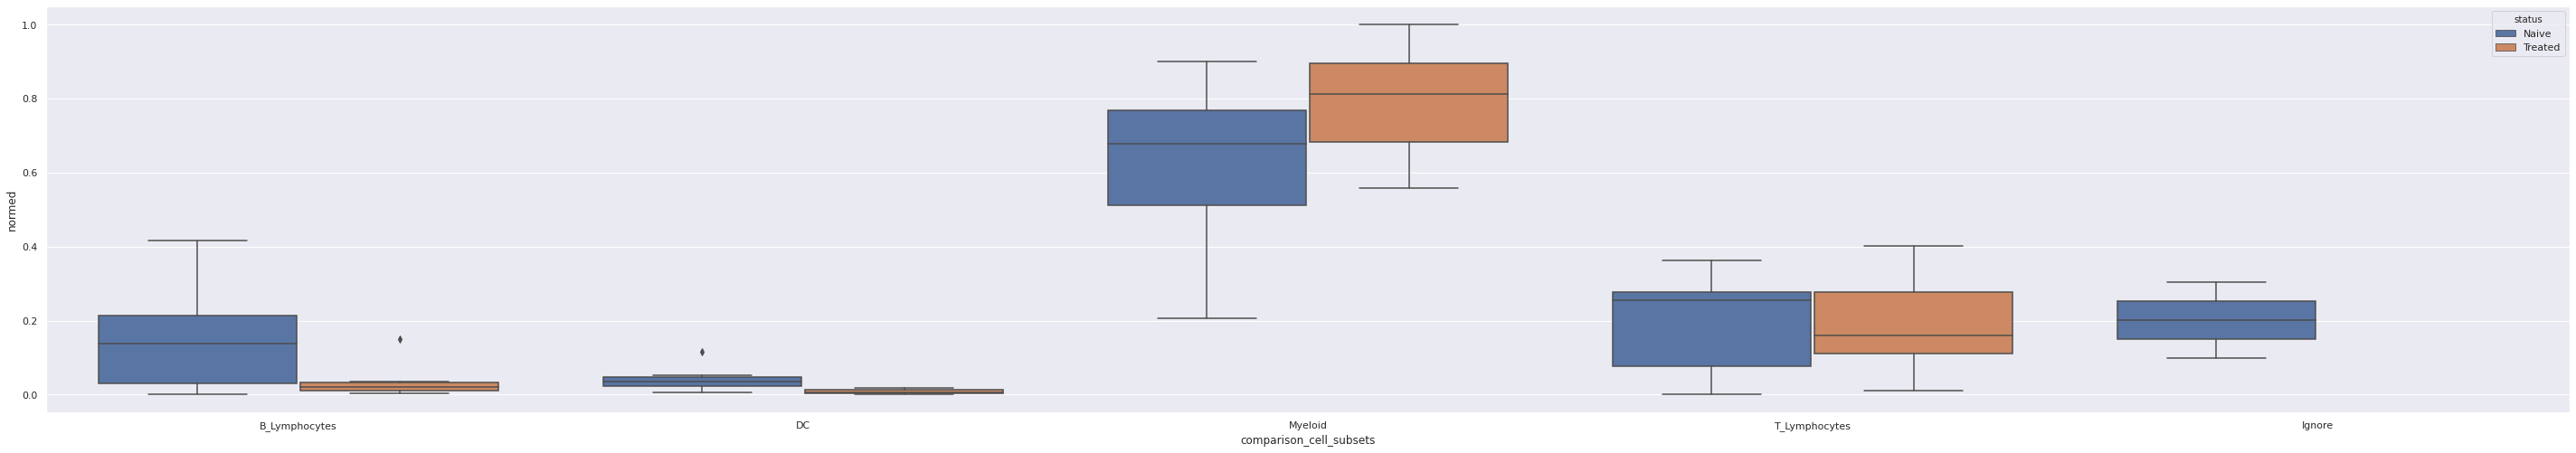

/home/unix/kjag/.conda/envs/pegasus/lib/python3.7/site-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


Ignore MannwhitneyuResult(statistic=0.0, pvalue=0.0)
T_Lymphocytes MannwhitneyuResult(statistic=69.0, pvalue=0.48832183431683057)
DC MannwhitneyuResult(statistic=7.0, pvalue=0.00023599273179027462)
Myeloid MannwhitneyuResult(statistic=43.0, pvalue=0.0214800730142125)
B_Lymphocytes MannwhitneyuResult(statistic=28.0, pvalue=0.022570312786077316)


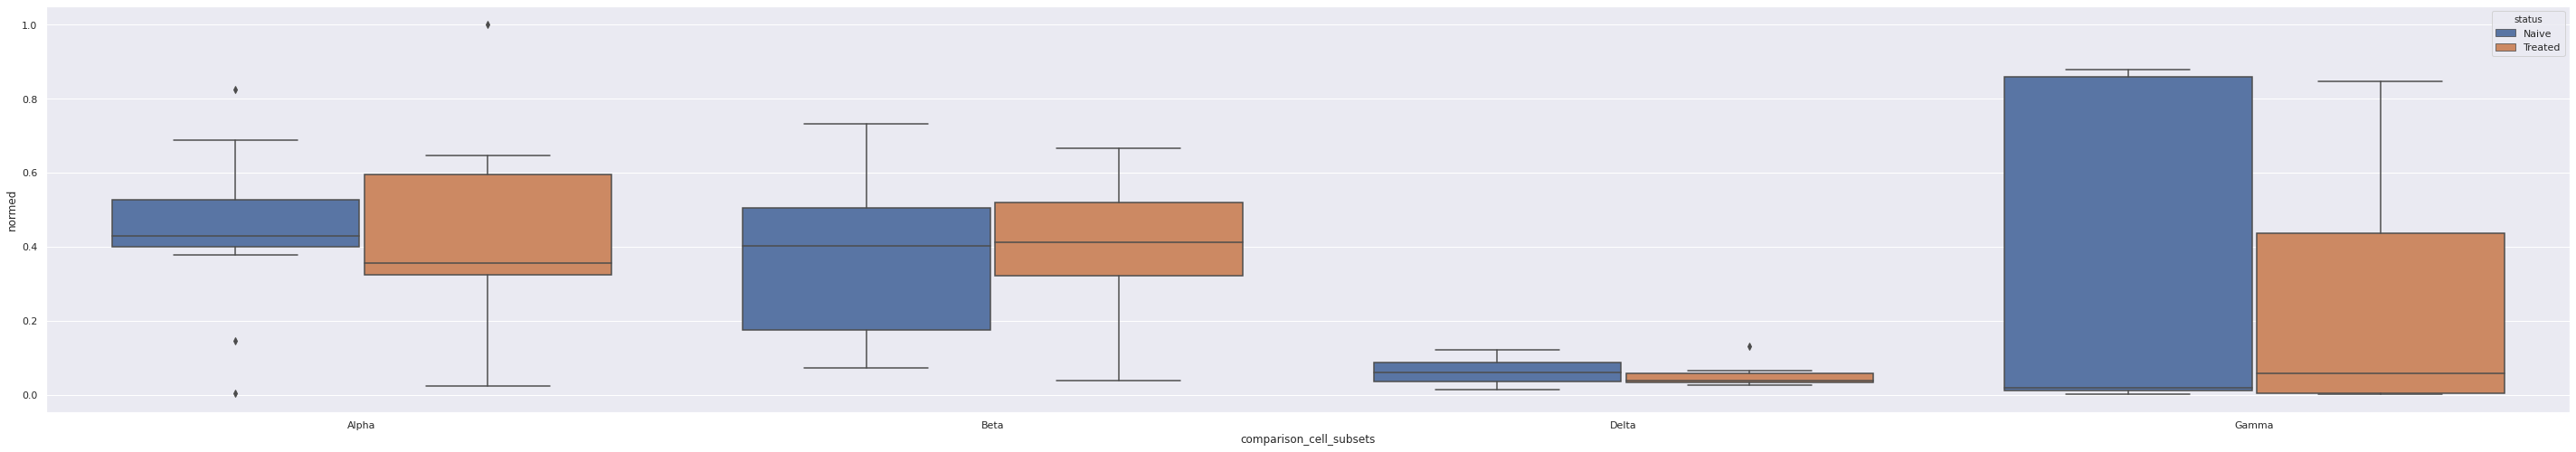

Gamma MannwhitneyuResult(statistic=19.0, pvalue=0.26145161725633537)
Delta MannwhitneyuResult(statistic=40.0, pvalue=0.2470622722046319)
Alpha MannwhitneyuResult(statistic=56.0, pvalue=0.3964063083160365)
Beta MannwhitneyuResult(statistic=60.0, pvalue=0.3900924244130194)


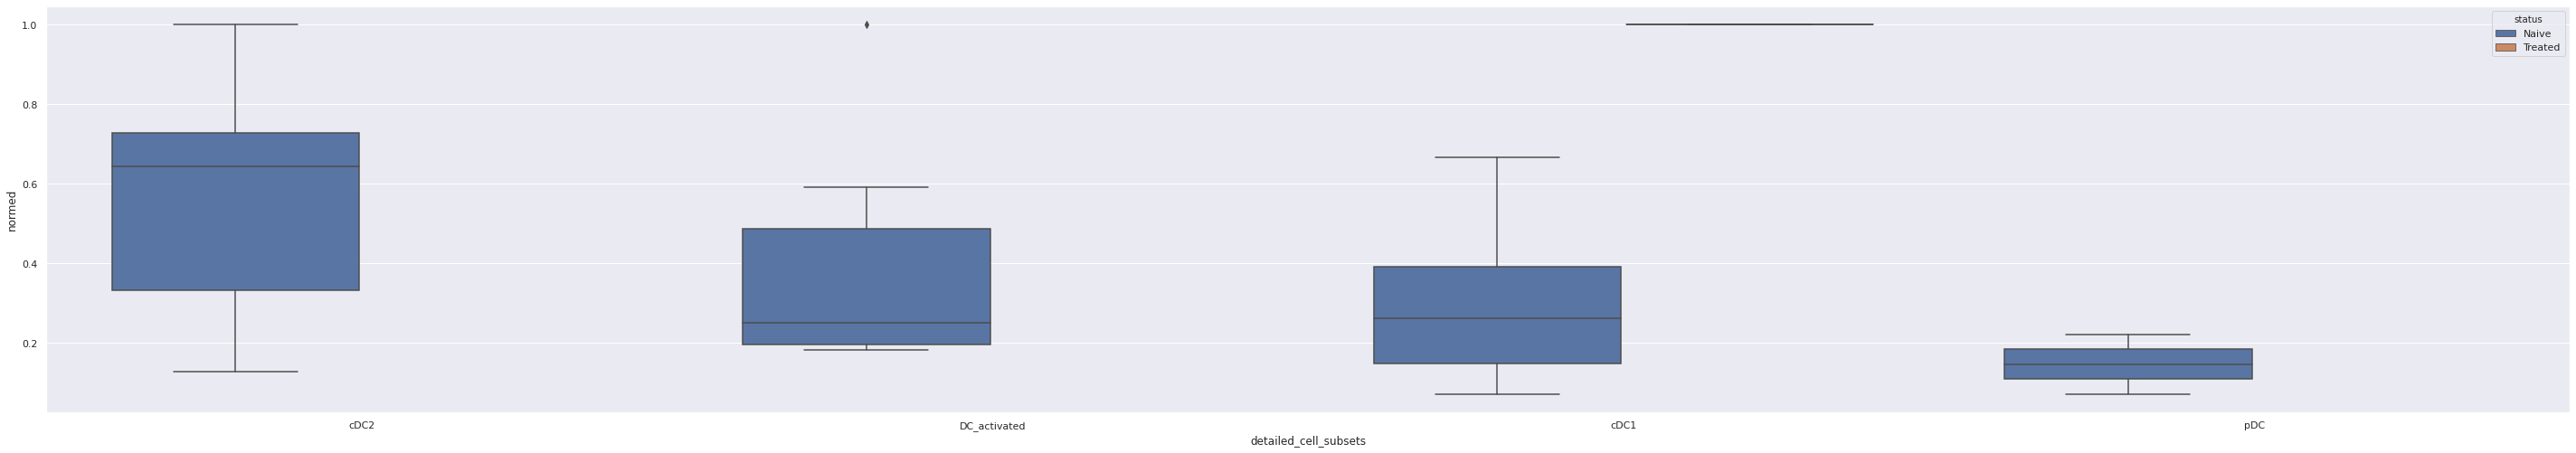

pDC MannwhitneyuResult(statistic=0.0, pvalue=0.0)
DC_activated MannwhitneyuResult(statistic=0.0, pvalue=0.0)
cDC2 MannwhitneyuResult(statistic=0.0, pvalue=0.0)
cDC1 MannwhitneyuResult(statistic=0.0, pvalue=6.121759176529256e-05)


/home/unix/kjag/.conda/envs/pegasus/lib/python3.7/site-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


In [14]:
count_df = totaldata.obs[['pid', 'status', 'comparison_cell_subsets', 'detailed_cell_subsets']].groupby(['pid']).agg({'detailed_cell_subsets':'count'}).reset_index()
pid2count = count_df.set_index('pid').to_dict()['detailed_cell_subsets']

violin_df = totaldata.obs[['pid', 'status', 'detailed_cell_subsets', 'comparison_cell_subsets']].groupby(['pid', 'detailed_cell_subsets', 'status']).agg({'comparison_cell_subsets':'count'}).reset_index()
violin_df['total'] = [pid2count[pid] for pid in violin_df['pid']]
violin_df['normed'] = violin_df['comparison_cell_subsets']/violin_df['total']

sns.set(rc={'figure.figsize':(50,8.27)})
sns.boxplot(x='detailed_cell_subsets', y='normed', hue='status', data=violin_df)
plt.show()

for tt in set(violin_df['detailed_cell_subsets']):
    tmp = violin_df[violin_df['detailed_cell_subsets']==tt]
    print(tt, mannwhitneyu(tmp[tmp['status']=='Naive']['normed'], tmp[tmp['status']=='Treated']['normed']))    
violin_df.to_csv('/ahg/regevdata/projects/Pancreas/src/deconvolution/%s_counts.tsv'%'Total', sep='\t')

for celltype in ['Immune', 'Endocrine']:
    subset = totaldata[totaldata.obs['cell_subsets']==celltype]

    count_df = subset.obs[['pid', 'status', 'comparison_cell_subsets', 'cell_subsets']].groupby(['pid']).agg({'cell_subsets':'count'}).reset_index()
    pid2count = count_df.set_index('pid').to_dict()['cell_subsets']
    
    violin_df = subset.obs[['pid', 'status', 'comparison_cell_subsets', 'cell_subsets']].groupby(['pid', 
                                                                         'comparison_cell_subsets', 
                                                                         'status']).agg({'cell_subsets':'count'}).reset_index()
    violin_df['total'] = [pid2count[pid] for pid in violin_df['pid']]
    violin_df['normed'] = violin_df['cell_subsets']/violin_df['total']
    
    sns.set(rc={'figure.figsize':(50,8.27)})
    sns.boxplot(x='comparison_cell_subsets', y='normed', hue='status', data=violin_df)
    plt.show()
    
    for tt in set(violin_df['comparison_cell_subsets']):
        tmp = violin_df[violin_df['comparison_cell_subsets']==tt]
        print(tt, mannwhitneyu(tmp[tmp['status']=='Naive']['normed'], tmp[tmp['status']=='Treated']['normed']))
    violin_df.to_csv('/ahg/regevdata/projects/Pancreas/src/deconvolution/%s_counts.tsv'%celltype, sep='\t')

for celltype in ['DC']:
    subset = totaldata[totaldata.obs['comparison_cell_subsets']==celltype]

    count_df = subset.obs[['pid', 'status', 'comparison_cell_subsets', 'cell_subsets']].groupby(['pid']).agg({'cell_subsets':'count'}).reset_index()
    pid2count = count_df.set_index('pid').to_dict()['cell_subsets']
    
    violin_df = subset.obs[['pid', 'status', 'comparison_cell_subsets', 'detailed_cell_subsets']].groupby(['pid', 
                                                                         'detailed_cell_subsets', 
                                                                         'status']).agg({'comparison_cell_subsets':'count'}).reset_index()
    violin_df['total'] = [pid2count[pid] for pid in violin_df['pid']]
    violin_df['normed'] = violin_df['comparison_cell_subsets']/violin_df['total']
    
    sns.set(rc={'figure.figsize':(50,8.27)})
    sns.boxplot(x='detailed_cell_subsets', y='normed', hue='status', data=violin_df)
    plt.show()
    
    for tt in set(violin_df['detailed_cell_subsets']):
        tmp = violin_df[violin_df['detailed_cell_subsets']==tt]
        print(tt, mannwhitneyu(tmp[tmp['status']=='Naive']['normed'], tmp[tmp['status']=='Treated']['normed']))
    violin_df.to_csv('/ahg/regevdata/projects/Pancreas/src/deconvolution/%s_counts.tsv'%celltype, sep='\t')


In [29]:
count_df = totaldata.obs[['pid', 'status', 'comparison_cell_subsets', 'cell_subsets']].groupby(['pid']).agg({'cell_subsets':'count'}).reset_index()
pid2count = count_df.set_index('pid').to_dict()['cell_subsets']

violin_df = totaldata.obs[['pid', 'status', 'comparison_cell_subsets', 'detailed_cell_subsets']].groupby(['pid', 
                                                                     'detailed_cell_subsets', 
                                                                     'status']).agg({'comparison_cell_subsets':'count'}).reset_index()
violin_df['total'] = [pid2count[pid] for pid in violin_df['pid']]
violin_df['normed'] = violin_df['comparison_cell_subsets']/violin_df['total']

In [38]:
violin_df.pivot(index='pid', columns='detailed_cell_subsets', values='normed').fillna(0).to_csv("/ahg/regevdata/projects/Pancreas/src/data/pid_celltype_counts.csv", sep="\t")

In [37]:
violin_df

,pid,detailed_cell_subsets,status,comparison_cell_subsets,total,normed
0,003_10x,Alpha,Naive,13,1865,0.006971
1,003_10x,B,Naive,14,1865,0.007507
2,003_10x,Beta,Naive,15,1865,0.008043
3,003_10x,CD4pos_T,Naive,2,1865,0.001072
4,003_10x,CD4pos_Tregs,Naive,1,1865,0.000536
...,...,...,...,...,...,...
438,2668_10x,Macrophages_Monocytes,Treated,312,5738,0.054374
439,2668_10x,Plasma,Treated,4,5738,0.000697
440,2668_10x,Schwann,Treated,13,5738,0.002266
441,2668_10x,Tumor,Treated,47,5738,0.008191


In [32]:
status_df = totaldata.obs[['pid', 'status', 'comparison_cell_subsets', 'cell_subsets']].groupby(['pid', 'status']).agg({'cell_subsets':'count'}).reset_index()
pid2status = status_df.set_index('pid').to_dict()['status']
pidstatus = pd.DataFrame([pid2status[pid] for pid in violin_df.pivot(index='pid', columns='detailed_cell_subsets', values='total').fillna(0).index])

In [33]:
pidstatus.to_csv("/ahg/regevdata/projects/Pancreas/src/data/pid_status.csv")

In [34]:
! Rscript /ahg/regevdata/projects/Pancreas/src/runDirichlet.R /ahg/regevdata/projects/Pancreas/src/data/pid_celltype_counts.csv /ahg/regevdata/projects/Pancreas/src/data/pid_status.csv /ahg/regevdata/projects/Pancreas/src/data/dirichletout.csv

Error in `.rowNamesDF<-`(x, value = value) : invalid 'row.names' length
Calls: rownames<- ... row.names<- -> row.names<-.data.frame -> .rowNamesDF<-
Execution halted
